# Data Analysis - OLS

The following resources are available for this Notebook

[Econ-Ark](https://econ-ark.org/)
>The aim of the Econ-ARK project is to make it easier for social scientists to do ‘structur)
al modeling’ of economic choice behavior by providing a well-documented, open source codebase containing the core techniques in a way that can be relatively easily adapted to address many different questions in both macro- and microeconomics



## More site
- [kaggle](https://www.kaggle.com/)
- [statsmodels](https://www.statsmodels.org/stable/index.html)
- [using FRED database example](https://newdigitals.org/2023/04/20/fred-api-recession/) 

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your FRED API key
fred = Fred(api_key='82ba5f8ea1a8c0a9dd0493c106f9136c')

Dependent Variable: Unemployment Rate (e.g., "UNRATE").
Independent Variables:

    Inflation Rate (e.g., "CPIAUCSL").
    Real GDP Growth (e.g., "GDPC1").
    Interest Rates (e.g., "FEDFUNDS").

In [11]:
# Fetch data from FRED
unemployment = fred.get_series('UNRATE')
inflation = fred.get_series('CPIAUCSL')
gdp = fred.get_series('GDPC1')
fed_funds = fred.get_series('FEDFUNDS')

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Unemployment': unemployment,
    'Inflation': inflation,
    'GDP': gdp,
    'FedFunds': fed_funds
})

# Reset the index to a time-series structure
data.index = pd.to_datetime(data.index)
data = data.resample('QE').mean()  # Resample to quarterly frequency if needed

# Drop rows with missing values
data = data.dropna()

print(data.head())

            Unemployment  Inflation       GDP  FedFunds
1954-09-30      5.966667  26.840000  2880.482  1.030000
1954-12-31      5.333333  26.756667  2936.852  0.986667
1955-03-31      4.733333  26.793333  3020.746  1.343333
1955-06-30      4.400000  26.756667  3069.910  1.500000
1955-09-30      4.100000  26.776667  3111.379  1.940000


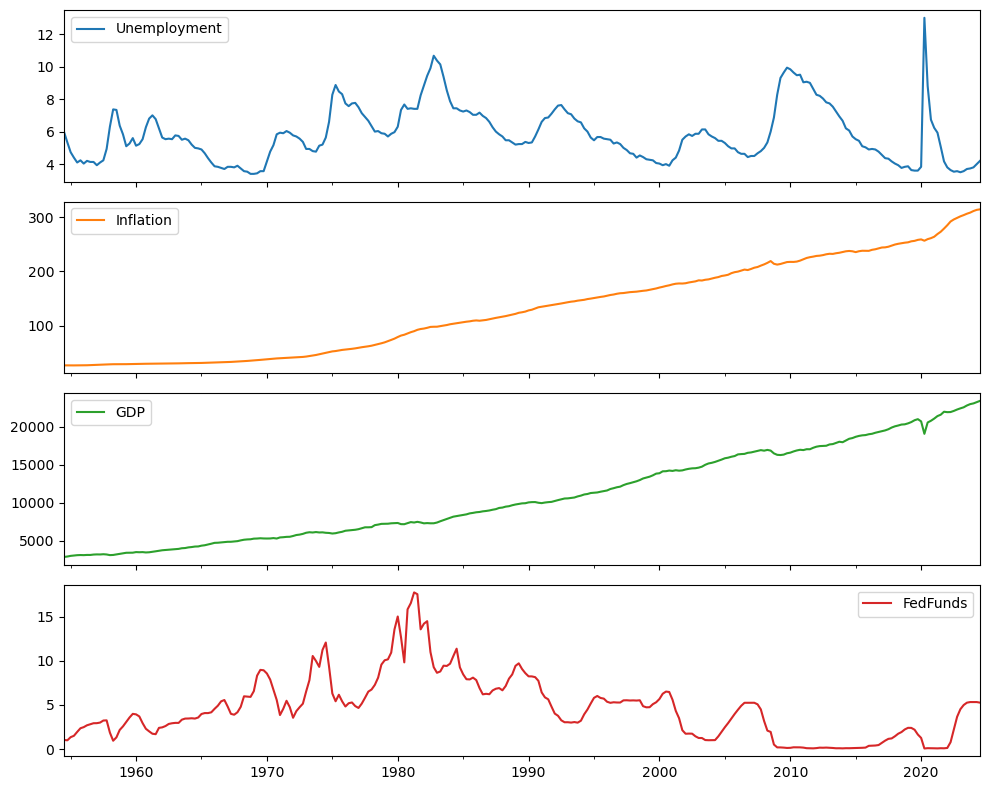

In [13]:
# Visualize the data
data.plot(subplots=True, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [15]:
# Summary Statistics
print(data.describe())

       Unemployment   Inflation           GDP    FedFunds
count    281.000000  281.000000    281.000000  281.000000
mean       5.829893  131.137040  10913.908623    4.609205
std        1.664248   84.939155   5950.314373    3.556331
min        3.400000   26.756667   2880.482000    0.060000
25%        4.633333   41.333333   5632.649000    1.923333
50%        5.566667  124.600000   9919.228000    4.326667
75%        6.866667  204.317000  16396.151000    6.266667
max       13.000000  314.113667  23386.733000   17.780000


In [17]:
# View Correlations
print(data.corr())

              Unemployment  Inflation       GDP  FedFunds
Unemployment      1.000000  -0.004862 -0.055404  0.066874
Inflation        -0.004862   1.000000  0.993356 -0.401850
GDP              -0.055404   0.993356  1.000000 -0.415939
FedFunds          0.066874  -0.401850 -0.415939  1.000000


In [19]:
data['Lag1'] = data['Unemployment'].shift(1)
data = data.dropna()

print(data.head())

            Unemployment  Inflation       GDP  FedFunds      Lag1
1954-12-31      5.333333  26.756667  2936.852  0.986667  5.966667
1955-03-31      4.733333  26.793333  3020.746  1.343333  5.333333
1955-06-30      4.400000  26.756667  3069.910  1.500000  4.733333
1955-09-30      4.100000  26.776667  3111.379  1.940000  4.400000
1955-12-31      4.233333  26.856667  3130.068  2.356667  4.100000


In [23]:
# Dependent variable: Unemployment
y = data['Unemployment']

# Independent variables
X = data[['Lag1', 'Inflation', 'GDP', 'FedFunds']]

# Add a constant for the intercept
X = sm.add_constant(X)


In [25]:
model = sm.OLS(y, X).fit()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     348.4
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.49e-106
Time:                        15:17:37   Log-Likelihood:                -287.50
No. Observations:                 280   AIC:                             585.0
Df Residuals:                     275   BIC:                             603.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0982      0.265      4.152      0.0

## Interpret Results

Questions to Answer:

    What is the R-squared value? How well does the model fit the data?
    Are the coefficients for each independent variable statistically significant? (Check p-values).
    What is the economic interpretation of the coefficients?

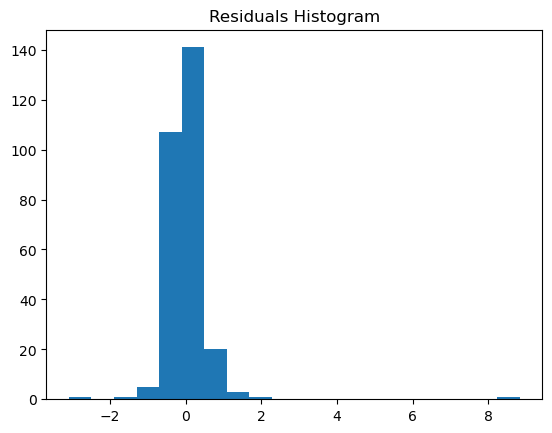

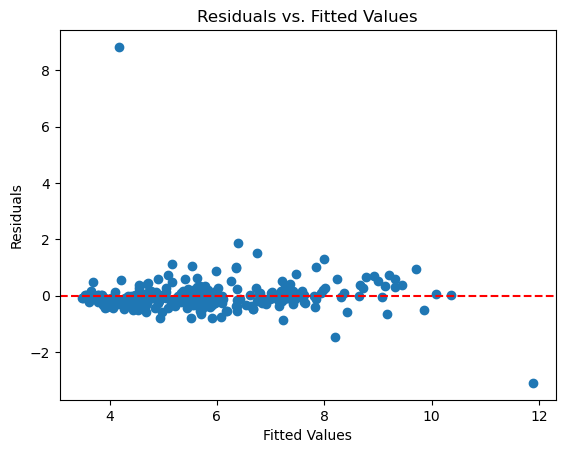

In [29]:
residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()

# Residuals vs. Fitted values
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [31]:
# Check for multicollinearity using Variance Inflation Factor (VIF):
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable        VIF
0      const  42.153436
1       Lag1   1.186407
2  Inflation  90.377719
3        GDP  91.761873
4   FedFunds   1.234773


Inflation (VIF = 76.40) and GDP (VIF = 77.46): These values suggest that Inflation and GDP are highly correlated with each other or other predictors.

FedFunds (VIF = 1.22): This is within the acceptable range, meaning it is not strongly correlated with other predictors.

In [17]:
print(X.corr())

           const      Lag1  Inflation       GDP  FedFunds
const        NaN       NaN        NaN       NaN       NaN
Lag1         NaN  1.000000   0.002760 -0.042865  0.041951
Inflation    NaN  0.002760   1.000000  0.993343 -0.408123
GDP          NaN -0.042865   0.993343  1.000000 -0.422959
FedFunds     NaN  0.041951  -0.408123 -0.422959  1.000000


Look for pairs of variables with correlations above 0.8 (a rule of thumb threshold for strong correlation).  We see GDP/inflation is at 0.99.  WOW!  We can see the same thing with a heatmap.

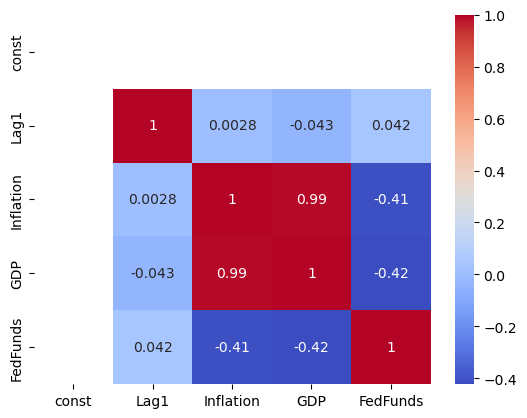

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


In [35]:
X = X.drop('GDP', axis=1) 

In [37]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     443.5
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          3.27e-105
Time:                        15:28:44   Log-Likelihood:                -293.32
No. Observations:                 280   AIC:                             594.6
Df Residuals:                     276   BIC:                             609.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4365      0.184      2.378      0.0

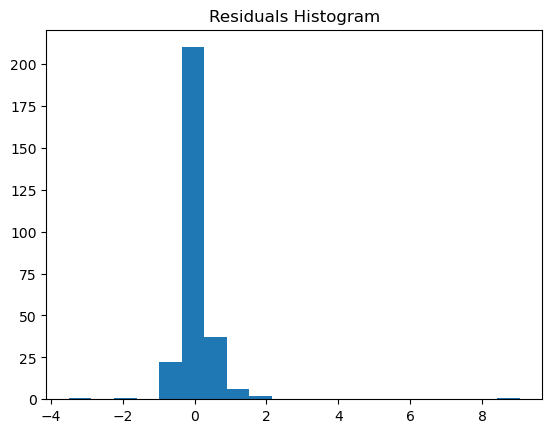

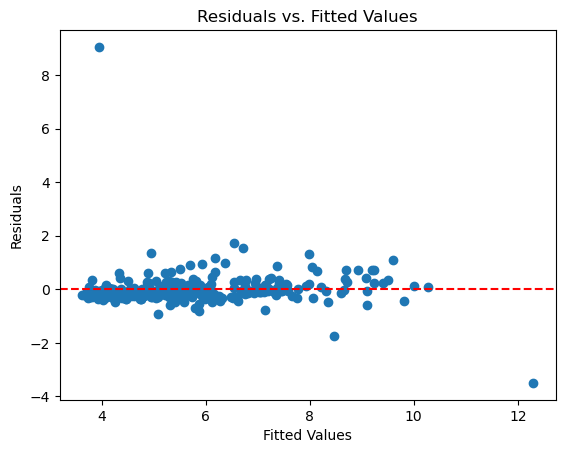

In [39]:
residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=20)
plt.title('Residuals Histogram')
plt.show()

# Residuals vs. Fitted values
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [22]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable        VIF
0      const  19.547618
1       Lag1   1.002239
2  Inflation   1.200424
3   FedFunds   1.202531


# sklearn

- https://medium.com/@chathurangad_12322/get-the-best-price-for-your-seattle-house-a-regression-model-2b8f2ab711a5
- [GitHub Site](https://github.com/GitHub-ccd/Housing_price_regression_model_MOD_2)

This code performs regression analysis on the California housing dataset. It includes steps to evaluate model performance, examine the residuals (errors), and perform diagnostics such as normality of residuals, homoscedasticity, and multicollinearity.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Load the data set

In [47]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names  # Get feature names
feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

- Dataset: California housing dataset contains predictors (features) in X and the target variable (housing prices) in y.
- Features (X): Includes variables like MedInc (median income) and AveRooms (average rooms).
- Target (y): Median housing prices in units of $100,000.

## Add Intercept
Adds a column of ones to X to produce an intercept

In [49]:
# Add a constant for the intercept (required for statsmodels)
X = sm.add_constant(X)

## Split Data
> Purpose: Splits the dataset:

- Training Set: Used to train the model.
- Testing Set: Used to evaluate model performance on unseen data.
- test_size=0.2: 20% of the data is reserved for testing.
- random_state=42: Ensures reproducibility by controlling the random split.

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model
> OLS (Ordinary Least Squares):

- Fits a linear model to minimize the sum of squared differences between observed and predicted values.
- .fit(): Finds the best-fit line (or hyperplane for multidimensional data).

In [53]:
# Fit the model using statsmodels for statistical results
model = sm.OLS(y_train, X_train).fit()

## Predict and Evaluate

- Prediction: The model predicts house prices on the test set (y_pred).
- Evaluation:
    - MSE (Mean Squared Error): Measures average squared difference between predicted and actual values. Lower MSE indicates better performance.


In [55]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print()

Model Evaluation:
Mean Squared Error: 0.5558915986952457



## Display Regression Results

> Regression Summary

- Coefficients: How much the target changes for a unit change in the predictor.
- R²: Proportion of variance in y explained by the model.
- p-values: Determine if predictors are statistically significant (p < 0.05).

In [57]:
# Regression results
print("Regression Results:")
print(model.summary())

# Extract coefficients, t-values, and p-values
coefficients = model.params
t_values = model.tvalues
p_values = model.pvalues

print("\nCoefficients, T-Values, and P-Values:")
for feature, coef, t_val, p_val in zip(['Intercept'] + feature_names, coefficients, t_values, p_values):
    print(f"{feature}: coefficient = {coef:.3f}, t-value = {t_val:.3f}, p-value = {p_val:.3f}")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:41:03   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728

## Diagnostic Tests

### Residuals Plot 

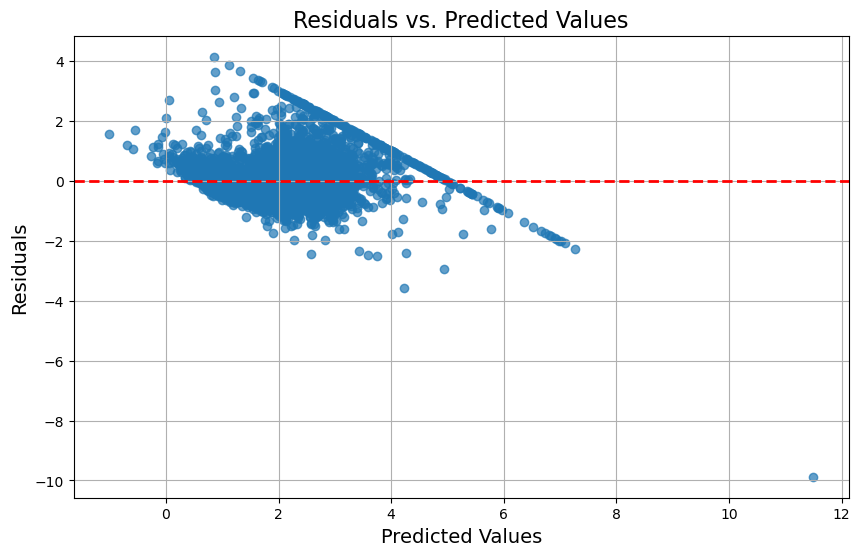

In [59]:

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs. Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.show()


### Residual Normality (Shapiro-Wilk Test)
- Purpose: Checks if residuals are normally distributed.
    - p-value > 0.05: Residuals are normal (desirable).

C:\Users\kmcca\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


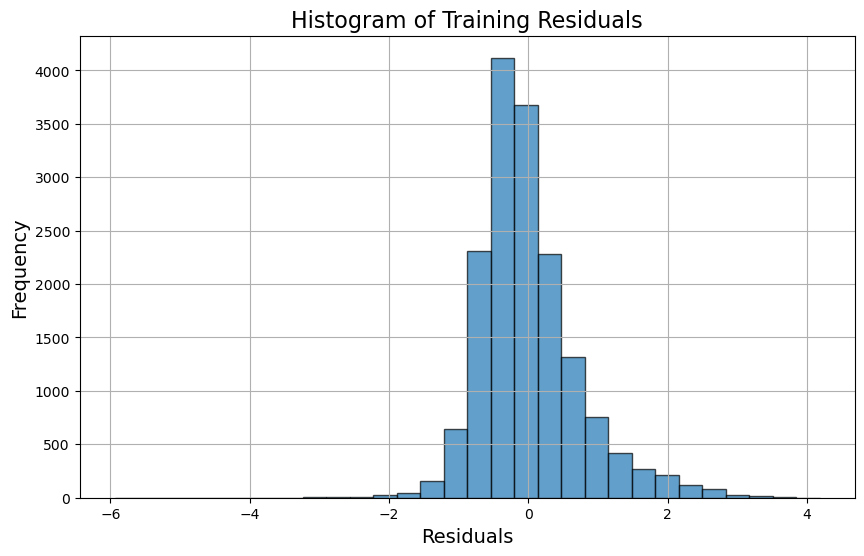

Shapiro-Wilk Test for Residual Normality: W = 0.928, p-value = 0.000


In [61]:
# Training residuals
train_residuals = y_train - model.predict(X_train)

# Normality of Residuals (Shapiro-Wilk Test)
shapiro_stat, shapiro_p = shapiro(train_residuals)
plt.figure(figsize=(10, 6))
plt.hist(train_residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Training Residuals', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()
print(f"Shapiro-Wilk Test for Residual Normality: W = {shapiro_stat:.3f}, p-value = {shapiro_p:.3f}")


### Homoscedasticity (Breusch-Pagan Test)
Purpose: Tests if residual variance is constant (homoscedasticity).
p-value > 0.05: Indicates constant variance (desirable).

In [63]:
_, bp_pvalue, _, _ = het_breuschpagan(train_residuals, X_train)
print(f"Breusch-Pagan Test for Homoscedasticity: p-value = {bp_pvalue:.3f}")

Breusch-Pagan Test for Homoscedasticity: p-value = 0.000


### Multicollinearity (Variance Inflation Factor)
> VIF (Variance Inflation Factor)

- Measures how much a predictor is correlated with others.
- VIF > 10: Indicates severe multicollinearity (undesirable).

In [65]:
# Multicollinearity (Variance Inflation Factor)
vif_data = pd.DataFrame({
    "Feature": ['Intercept'] + feature_names,
    "VIF": [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
})
print("\nVariance Inflation Factor (VIF):")
print(vif_data)



Variance Inflation Factor (VIF):
      Feature           VIF
0   Intercept  16901.024982
1      MedInc      2.539815
2    HouseAge      1.237337
3    AveRooms      7.917240
4   AveBedrms      6.609200
5  Population      1.134824
6    AveOccup      1.009733
7    Latitude      9.206134
8   Longitude      8.875984


In [67]:
# Display regression summary
print("\nRegression Summary:")
print(model.summary())


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:49:46   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.72

## Scaling
The process of scaling features is an essential step in regression modeling, especially when the features have vastly different ranges or units. Let’s break down this specific code snippet and explain its role in your analysis.

Typical code
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the features
```

> StandardScaler:

- Part of sklearn.preprocessing, this tool standardizes numerical data by adjusting the values of each feature so that:
    - Mean = 0
    - Standard Deviation = 1
-This ensures all features are on the same scale, regardless of their original units or range.

>fit_transform:

- fit: Computes the mean and standard deviation for each column (feature) of
- transform: applies the standardization formula to the dataset

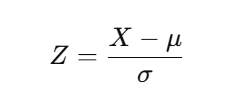
>Where:

- Z: The standardized value.
- X: The original value.
- μ: The mean of the feature.
- σ: The standard deviation of the feature.


In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Drop 'Latitude', 'Longitude', and 'Population'
features_to_drop = ['Longitude']
indices_to_keep = [i for i, feature in enumerate(feature_names) if feature not in features_to_drop]
X = X[:, indices_to_keep]
feature_names = [feature_names[i] for i in indices_to_keep]

# Scale the features (excluding the intercept)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the features

# Add the intercept back (as statsmodels requires it)
X_scaled = sm.add_constant(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Compute VIF
vif_data = pd.DataFrame({
    "Feature": ['Intercept'] + feature_names,
    "VIF": [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
})

# Print the regression summary and VIF
print("\nVariance Inflation Factor (VIF):")
print(vif_data)
print("\nRegression Summary (With Scaled Features):")
print(model.summary())



Variance Inflation Factor (VIF):
      Feature       VIF
0   Intercept  1.000069
1      MedInc  2.211507
2    HouseAge  1.145249
3    AveRooms  7.420153
4   AveBedrms  6.445369
5  Population  1.128803
6    AveOccup  1.008205
7    Latitude  1.065604

Regression Summary (With Scaled Features):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2868.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:52:48   Log-Likelihood:                -19256.
No. Observations:               16512   AIC:                         3.853e+04
Df Residuals:                   16504   BIC:                         3.859e+04
Df Model:                           7                                     